In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot styles for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\Joya Parveen\OneDrive\Desktop\ML-Task1(Data Cleaning)\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
summary_stats = df.describe().T

# Calculate median for numeric columns only
median = df.select_dtypes(include='number').median()
summary_stats['median'] = median

print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max    median  
PassengerId  891.0000  446.0000  
Survived       1.0000    0.0000  
Pclass         3.0000    3.0000  
Age           80.0000   28.0000  
SibSp          8.0000    0.0000  
Parch          6.0000    0.0000  
Fare         512.3292   14.4542  


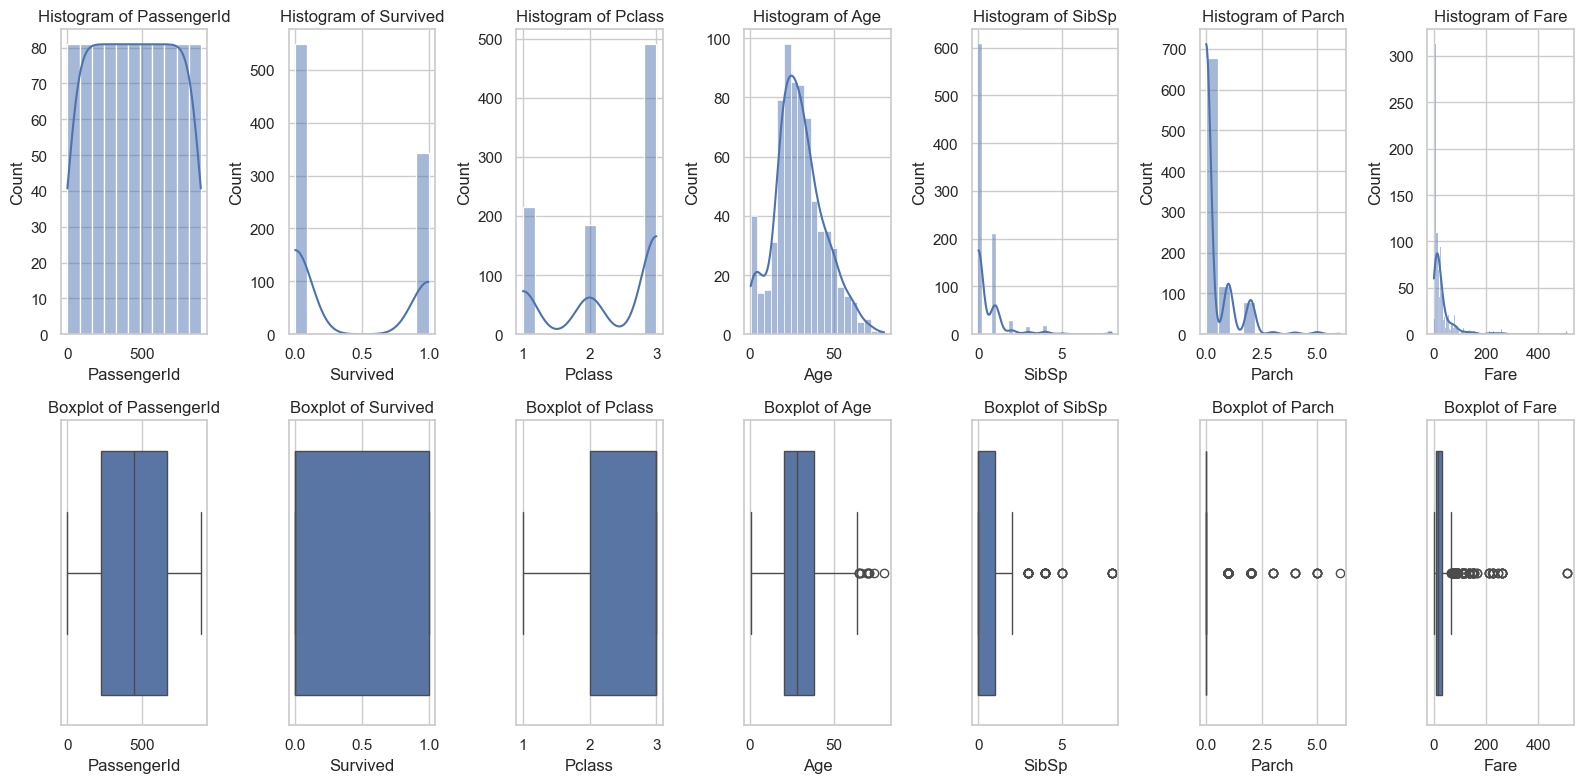

In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms and boxplots for each numeric feature
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols), i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(2, len(numeric_cols), i + len(numeric_cols))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

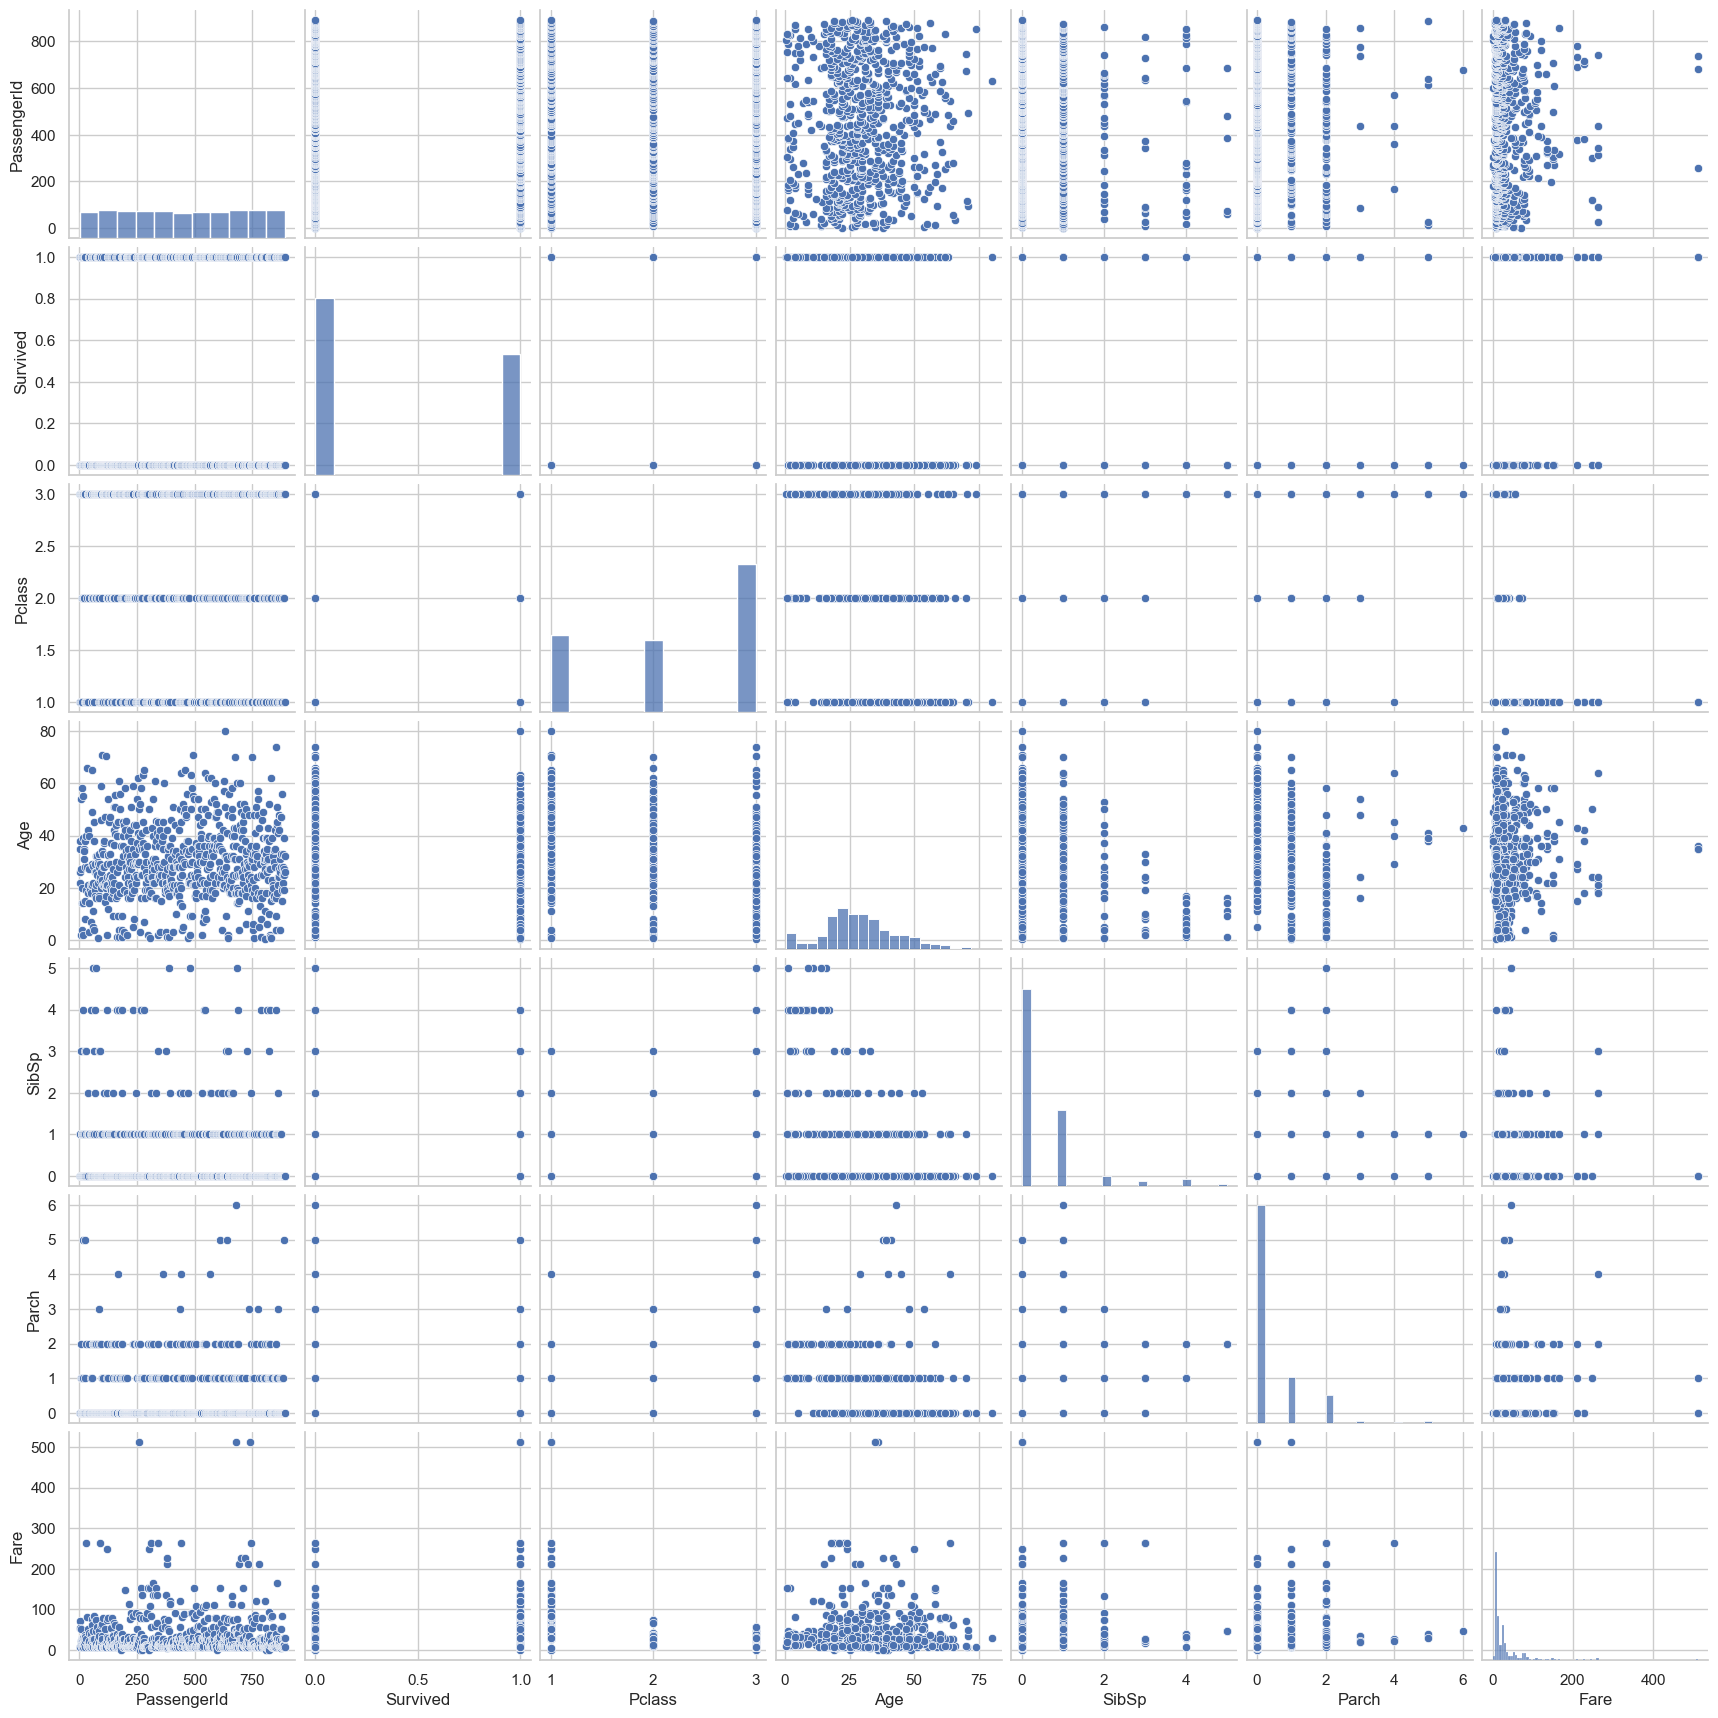

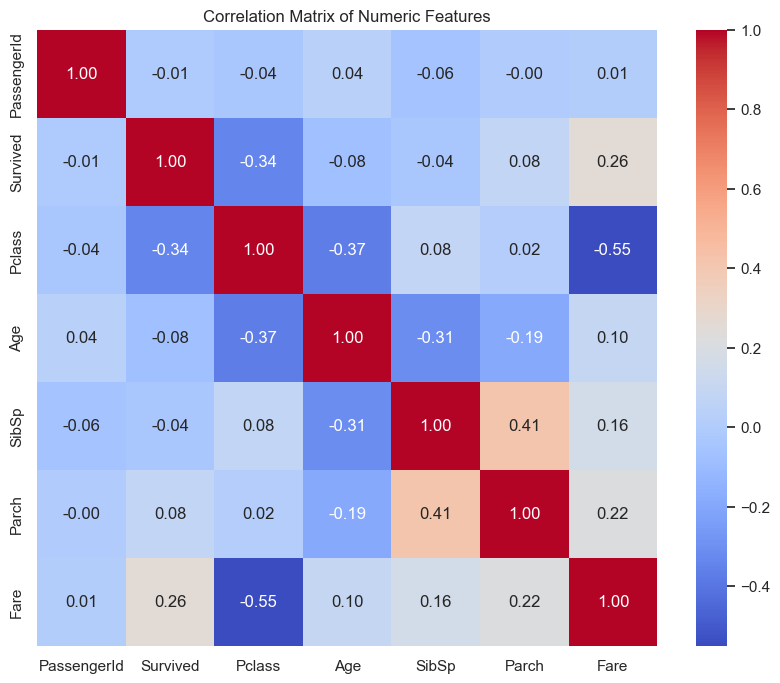

In [5]:
sns.pairplot(df[numeric_cols].dropna())
plt.show()

# Correlation matrix heatmap to identify feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

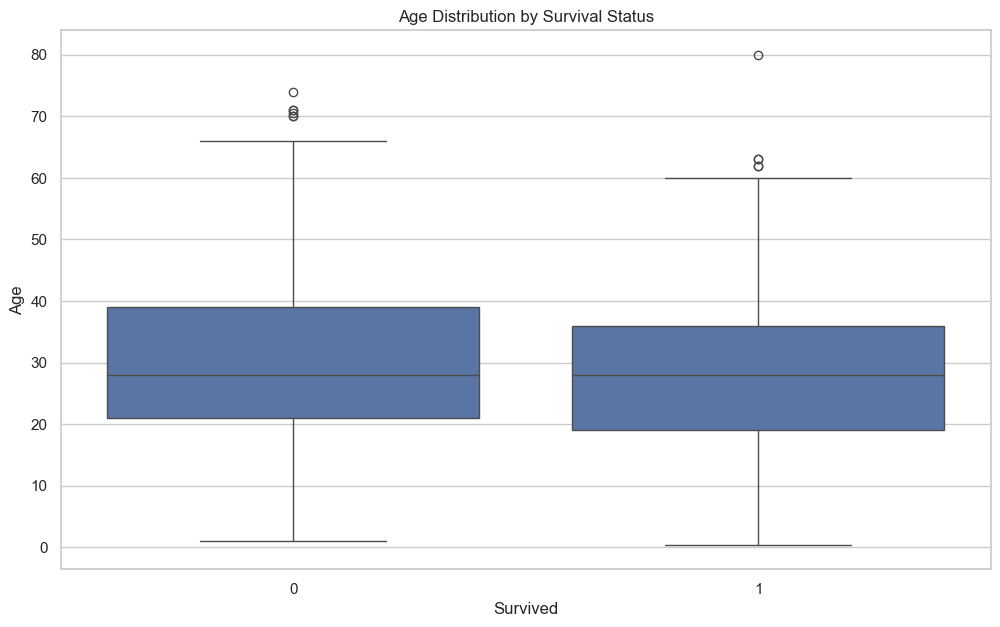

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

In [8]:
print("Feature-Level Inferences from Visualizations:\n")

print("1. Younger passengers, especially children, have higher survival rates, indicating prioritization during rescue.")
print("2. Passengers who paid higher fares tend to survive more, suggesting wealthier passengers had better access to lifeboats.")
print("3. First-class passengers have significantly higher survival rates than second and third classes.")
print("4. Females had a much higher survival rate compared to males, supporting 'women and children first' policy.")
print("5. Smaller family groups show varied survival, while very large families had lower survival rates.")
print("6. Correlation matrix indicates positive correlation between Fare and class, and younger age correlates with higher survival.")
print("7. Missing age data and outliers in Fare exist, which may affect analysis and model training.")


Feature-Level Inferences from Visualizations:

1. Younger passengers, especially children, have higher survival rates, indicating prioritization during rescue.
2. Passengers who paid higher fares tend to survive more, suggesting wealthier passengers had better access to lifeboats.
3. First-class passengers have significantly higher survival rates than second and third classes.
4. Females had a much higher survival rate compared to males, supporting 'women and children first' policy.
5. Smaller family groups show varied survival, while very large families had lower survival rates.
6. Correlation matrix indicates positive correlation between Fare and class, and younger age correlates with higher survival.
7. Missing age data and outliers in Fare exist, which may affect analysis and model training.
